In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import myLib

In [2]:
rawData = pd.read_csv("vehicles.csv")

In [3]:
rawData.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


<AxesSubplot:>

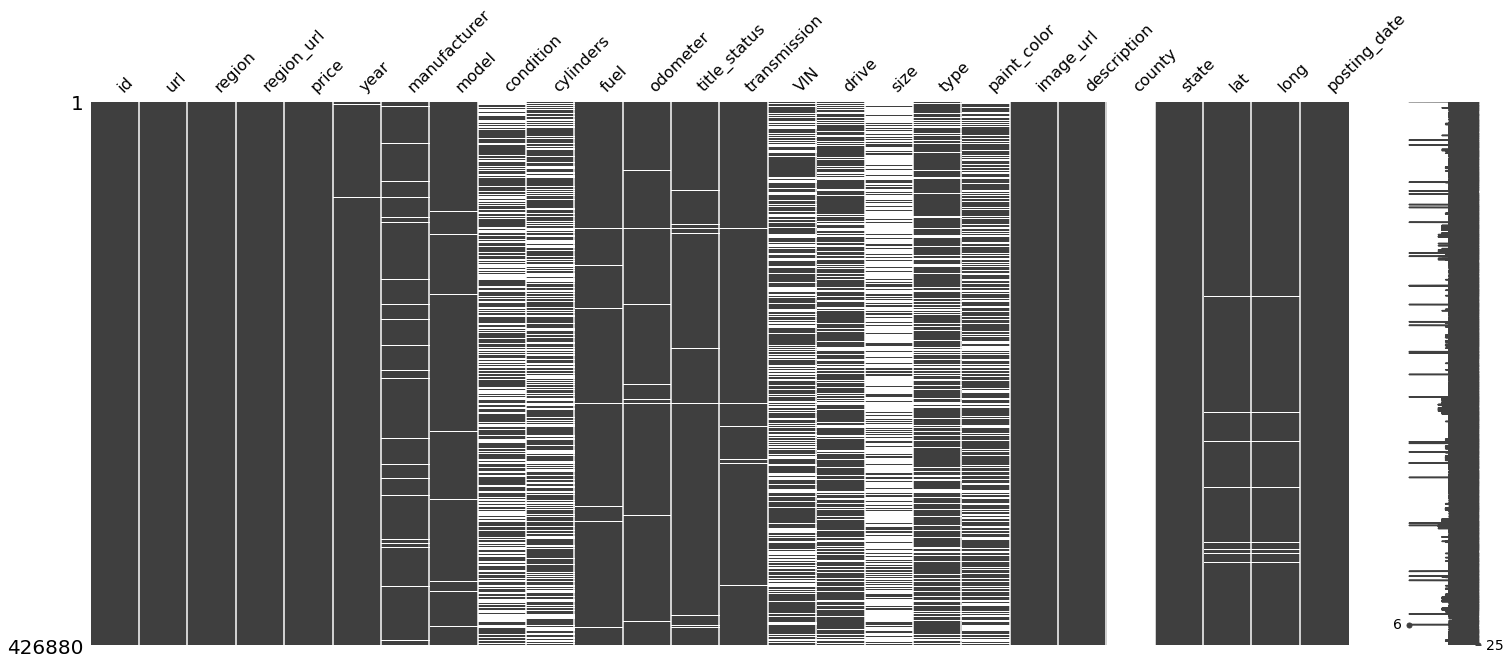

In [4]:
import missingno
missingno.matrix(rawData)

In [5]:
drop_columns = [
  'id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'state', 'posting_date', 'title_status'
]
rawData.drop(columns=drop_columns, inplace=True)

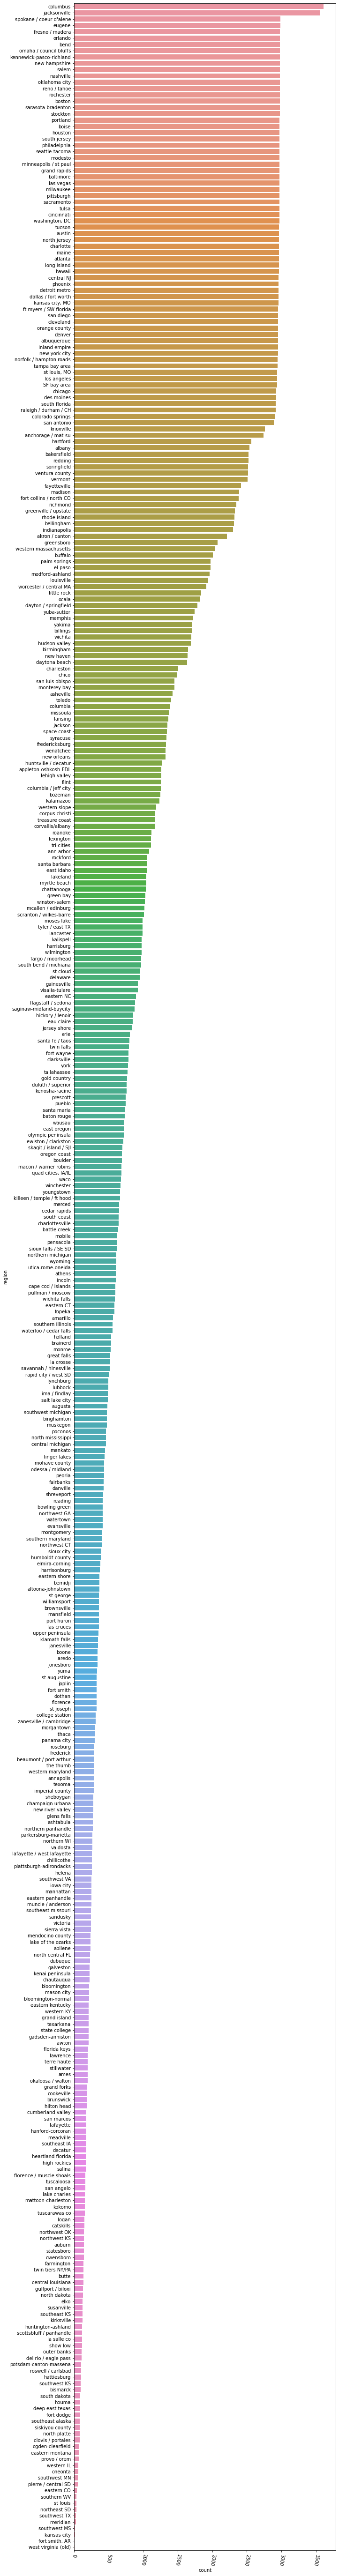

In [6]:
plt.figure(figsize=(10,100))
sns.countplot(data=rawData, y='region', order=rawData['region'].value_counts().index)
plt.xticks(rotation=260)
plt.show()

In [7]:
rawData['region'].value_counts().index

Index(['columbus', 'jacksonville', 'spokane / coeur d'alene', 'eugene',
       'fresno / madera', 'orlando', 'bend', 'omaha / council bluffs',
       'kennewick-pasco-richland', 'new hampshire',
       ...
       'eastern CO', 'southern WV', 'st louis', 'northeast SD', 'southwest TX',
       'meridian', 'southwest MS', 'kansas city', 'fort smith, AR',
       'west virginia (old)'],
      dtype='object', length=404)

<AxesSubplot:xlabel='manufacturer', ylabel='count'>

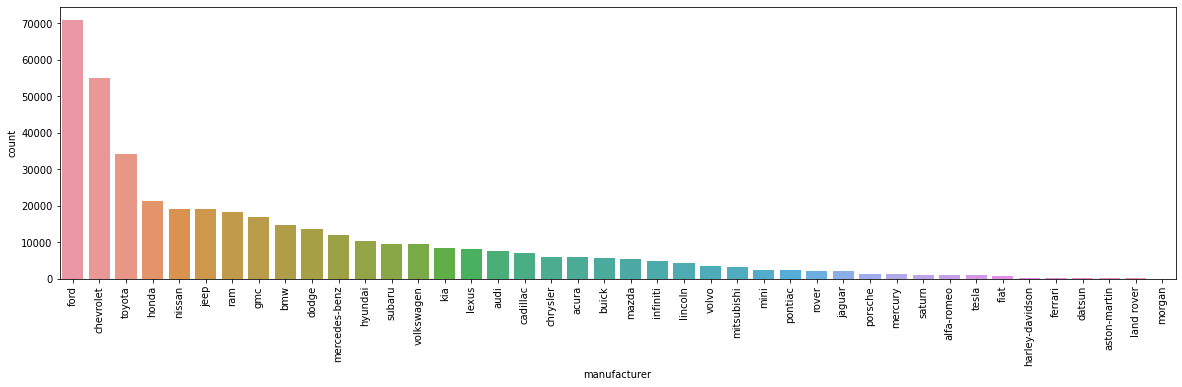

In [8]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(data=rawData, x='manufacturer', order=rawData.manufacturer.value_counts().index)


<AxesSubplot:xlabel='count', ylabel='model'>

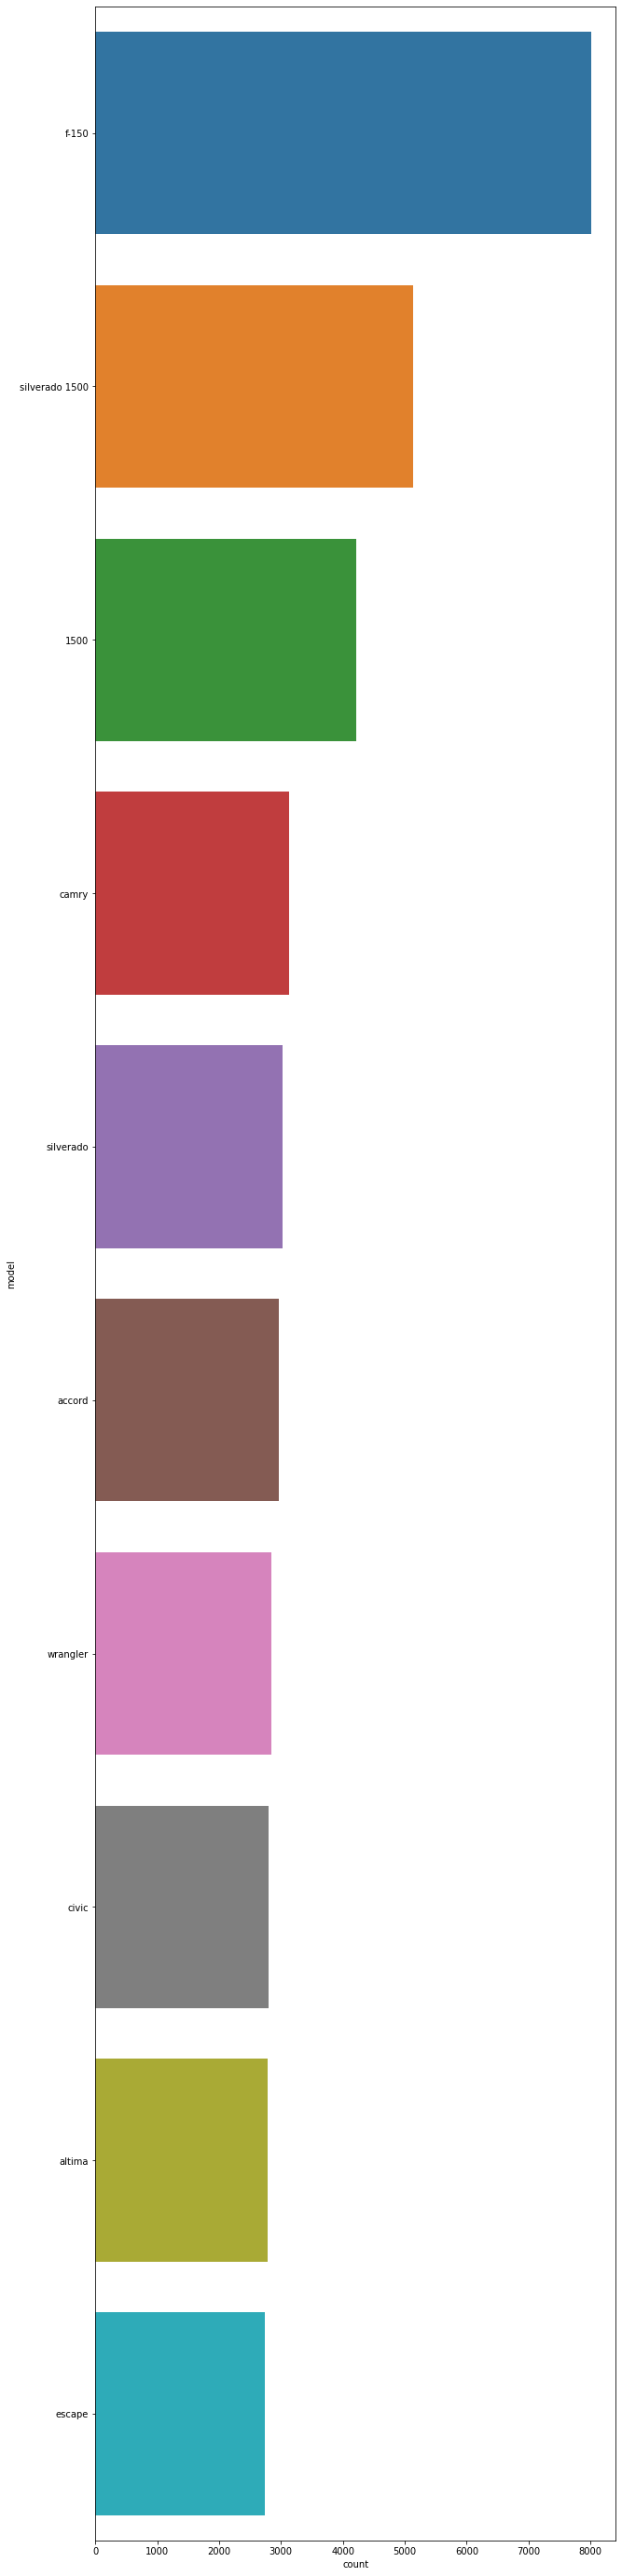

In [9]:
plt.figure(figsize=(10,50))
sns.countplot(data=rawData, y='model', order=rawData.model.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='condition', ylabel='count'>

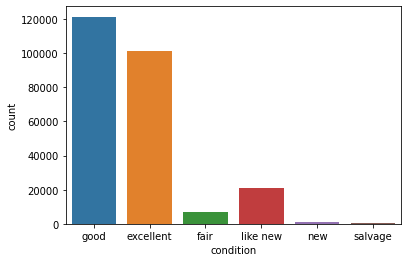

In [10]:
sns.countplot(data=rawData, x='condition')

<AxesSubplot:xlabel='cylinders', ylabel='count'>

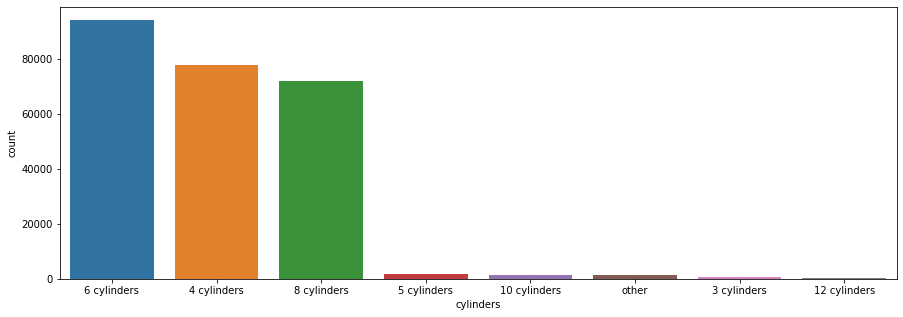

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=rawData, x='cylinders', order=rawData.cylinders.value_counts().index)

<AxesSubplot:xlabel='fuel', ylabel='count'>

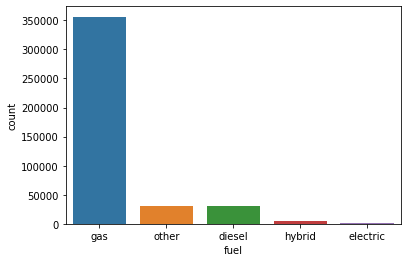

In [12]:
sns.countplot(data=rawData, x='fuel')

<AxesSubplot:xlabel='transmission', ylabel='count'>

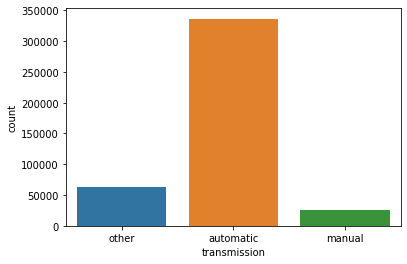

In [13]:
sns.countplot(data=rawData, x='transmission')

<AxesSubplot:xlabel='fuel'>

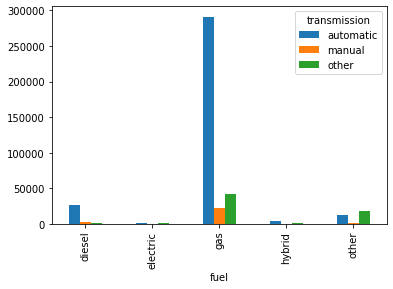

In [14]:
pd.crosstab(rawData['fuel'], rawData['transmission']).plot.bar()

In [15]:
pd.pivot_table(data=rawData, index='fuel', columns='transmission', values='price', aggfunc='sum')

transmission,automatic,manual,other
fuel,,,
diesel,2059865753,1465162110,23667664
electric,18770884,146179,22651176
gas,22759056117,2267408518,1273392209
hybrid,52041119,2126247,20975363
other,264846198,1247229272,538026480


<AxesSubplot:xlabel='drive', ylabel='count'>

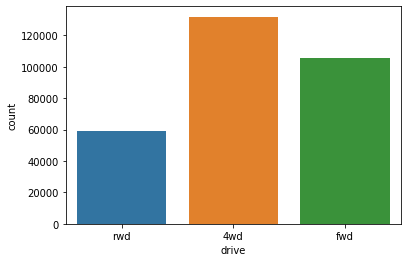

In [16]:
sns.countplot(data=rawData, x='drive')

<AxesSubplot:xlabel='size', ylabel='count'>

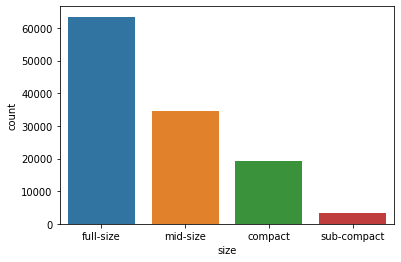

In [17]:
sns.countplot(data=rawData, x='size')

<AxesSubplot:xlabel='type', ylabel='count'>

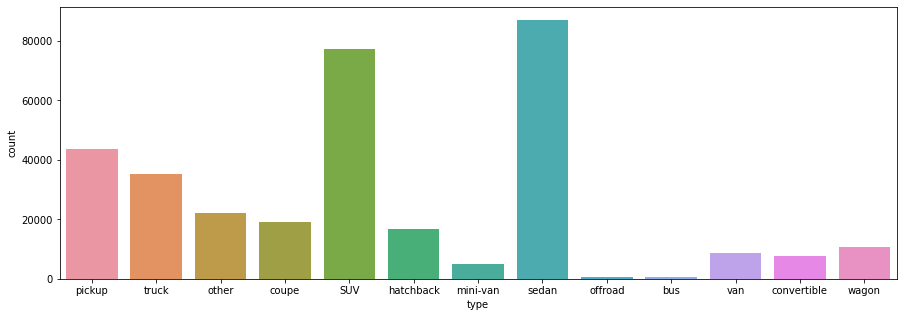

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=rawData, x='type')

<AxesSubplot:xlabel='paint_color', ylabel='count'>

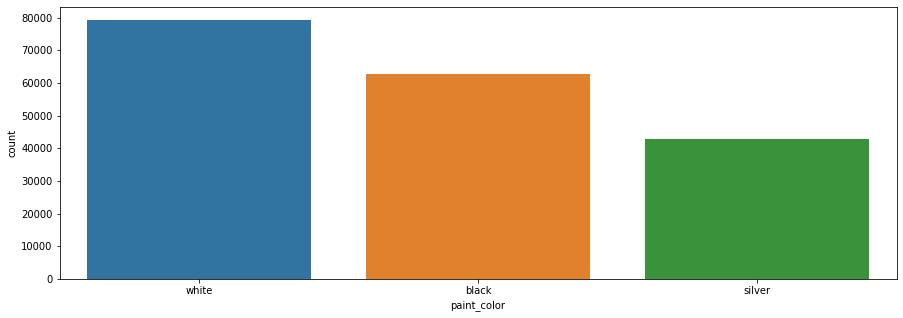

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=rawData, x='paint_color', order=rawData.paint_color.value_counts().iloc[:3].index)

In [20]:
rawData.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'lat', 'long'],
      dtype='object')

In [21]:
# sns.rugplot(data=rawData, x='price', height=1)

In [22]:
# sns.rugplot(data=rawData, x='odometer', height=1)

In [23]:
current_year = 2021
rawData['age'] = current_year - rawData['year']

<AxesSubplot:xlabel='age', ylabel='Count'>

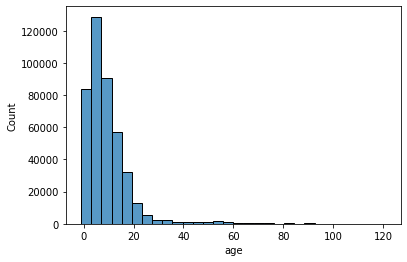

In [24]:
sns.histplot(data=rawData, x='age', bins=30)

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

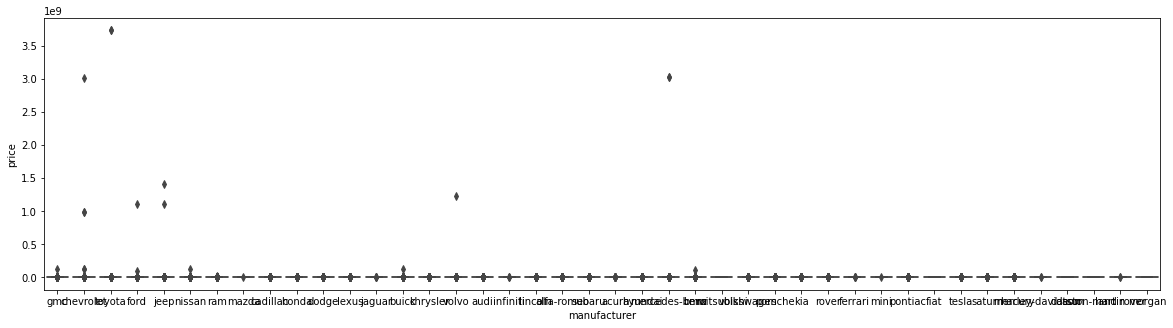

In [25]:
plt.figure(figsize=(20,5))
sns.boxplot(data=rawData, x='manufacturer', y='price')

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

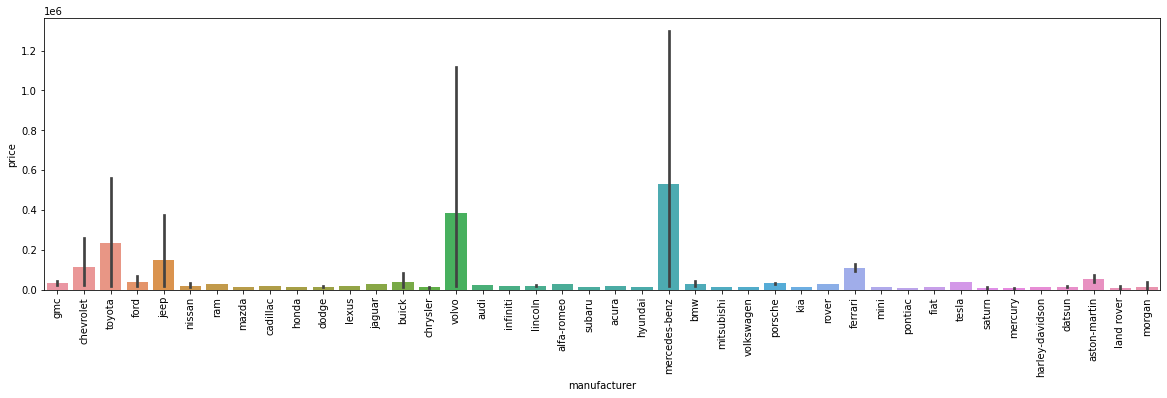

In [26]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(data=rawData, x='manufacturer', y='price')

<AxesSubplot:xlabel='model', ylabel='price'>

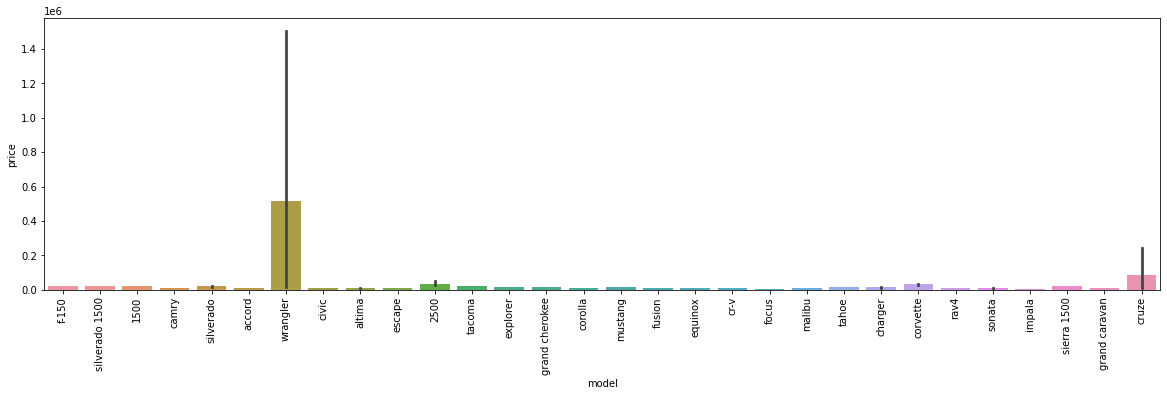

In [27]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(data=rawData, x='model', y='price', order=rawData['model'].value_counts().iloc[:30].index)

<AxesSubplot:xlabel='cylinders', ylabel='price'>

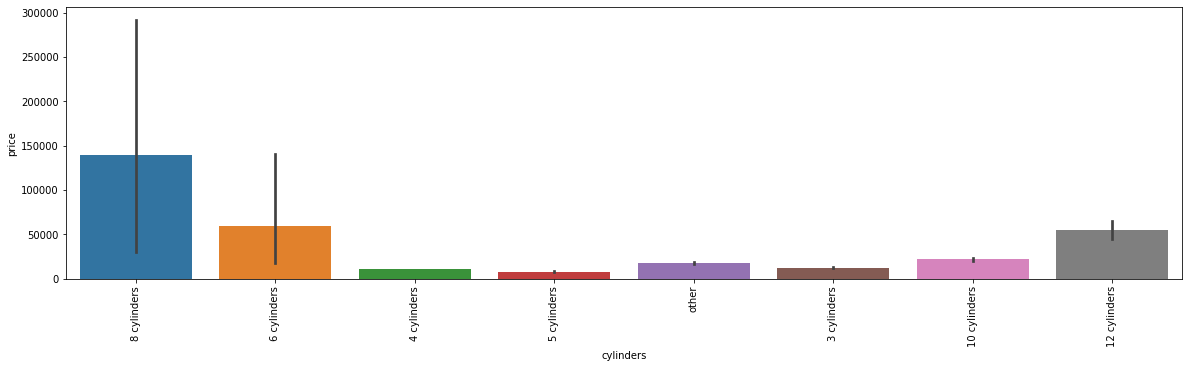

In [28]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(data=rawData, x='cylinders', y='price')

<AxesSubplot:xlabel='type', ylabel='price'>

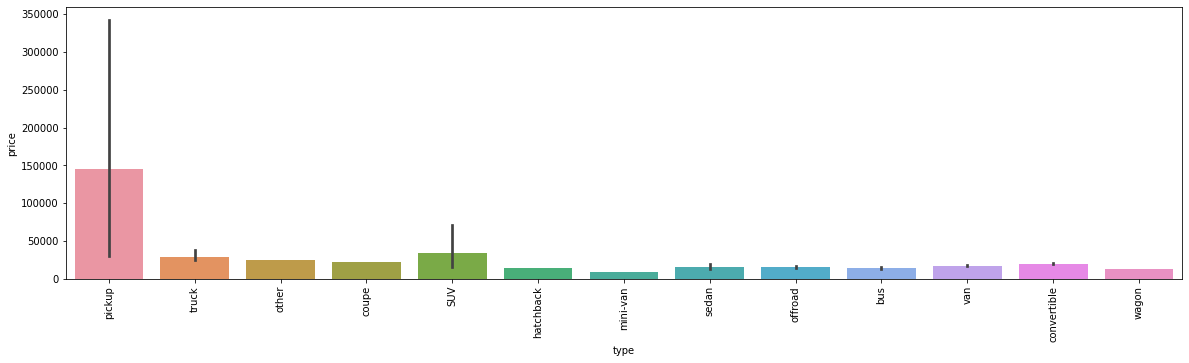

In [29]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(data=rawData, x='type', y='price')

In [30]:
high = rawData['price'].quantile(.99)
high

66995.0

In [31]:
low = rawData['price'].quantile(.1)
low

500.0

In [32]:
rawData = rawData[ (high > rawData['price']) & (rawData['price'] > low ) ]
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379462 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        379462 non-null  object 
 1   price         379462 non-null  int64  
 2   year          378406 non-null  float64
 3   manufacturer  364559 non-null  object 
 4   model         375141 non-null  object 
 5   condition     237284 non-null  object 
 6   cylinders     225105 non-null  object 
 7   fuel          376895 non-null  object 
 8   odometer      377387 non-null  float64
 9   transmission  377669 non-null  object 
 10  drive         263833 non-null  object 
 11  size          107263 non-null  object 
 12  type          297848 non-null  object 
 13  paint_color   269775 non-null  object 
 14  lat           376024 non-null  float64
 15  long          376024 non-null  float64
 16  age           378406 non-null  float64
dtypes: float64(5), int64(1), object(11)
memory usage

In [33]:
high = rawData['odometer'].quantile(0.99)
high

280000.0

In [34]:
# 너무 낮은 주행거리도 있지 않을까요? 
low = rawData['odometer'].quantile(0.1)
low

15812.0

In [35]:
# 주행거리도 마찬가지로 너무 낮은값과 너무 높은값은 제거
rawData = rawData[ (high > rawData['odometer']) & (rawData['odometer'] > low ) ]
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335851 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        335851 non-null  object 
 1   price         335851 non-null  int64  
 2   year          335248 non-null  float64
 3   manufacturer  324110 non-null  object 
 4   model         332433 non-null  object 
 5   condition     205777 non-null  object 
 6   cylinders     204816 non-null  object 
 7   fuel          333825 non-null  object 
 8   odometer      335851 non-null  float64
 9   transmission  334527 non-null  object 
 10  drive         236830 non-null  object 
 11  size          100527 non-null  object 
 12  type          262566 non-null  object 
 13  paint_color   239216 non-null  object 
 14  lat           332712 non-null  float64
 15  long          332712 non-null  float64
 16  age           335248 non-null  float64
dtypes: float64(5), int64(1), object(11)
memory usag

In [36]:
rawData = rawData[rawData.age <= 30]

In [37]:
# 일단 결측치가 너무 많은 size와 condition 항목은 제외
rawData.drop(columns=['size', 'condition', 'lat', 'long'], inplace=True)
rawData

,region,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,age
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,8 cylinders,gas,57923.0,other,NaN,pickup,white,7.0
28,auburn,22590,2010.0,chevrolet,silverado 1500,8 cylinders,gas,71229.0,other,NaN,pickup,blue,11.0
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,8 cylinders,gas,19160.0,other,NaN,pickup,red,1.0
30,auburn,30990,2017.0,toyota,tundra double cab sr,8 cylinders,gas,41124.0,other,NaN,pickup,red,4.0
31,auburn,15000,2013.0,ford,f-150 xlt,6 cylinders,gas,128000.0,automatic,rwd,truck,black,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426872,wyoming,32590,2020.0,mercedes-benz,c-class c 300,NaN,gas,19059.0,other,rwd,sedan,white,1.0
426874,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,6 cylinders,gas,30814.0,automatic,rwd,sedan,white,3.0
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,6 cylinders,gas,32226.0,other,fwd,sedan,NaN,2.0
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,6 cylinders,gas,30112.0,other,fwd,sedan,silver,3.0


<AxesSubplot:>

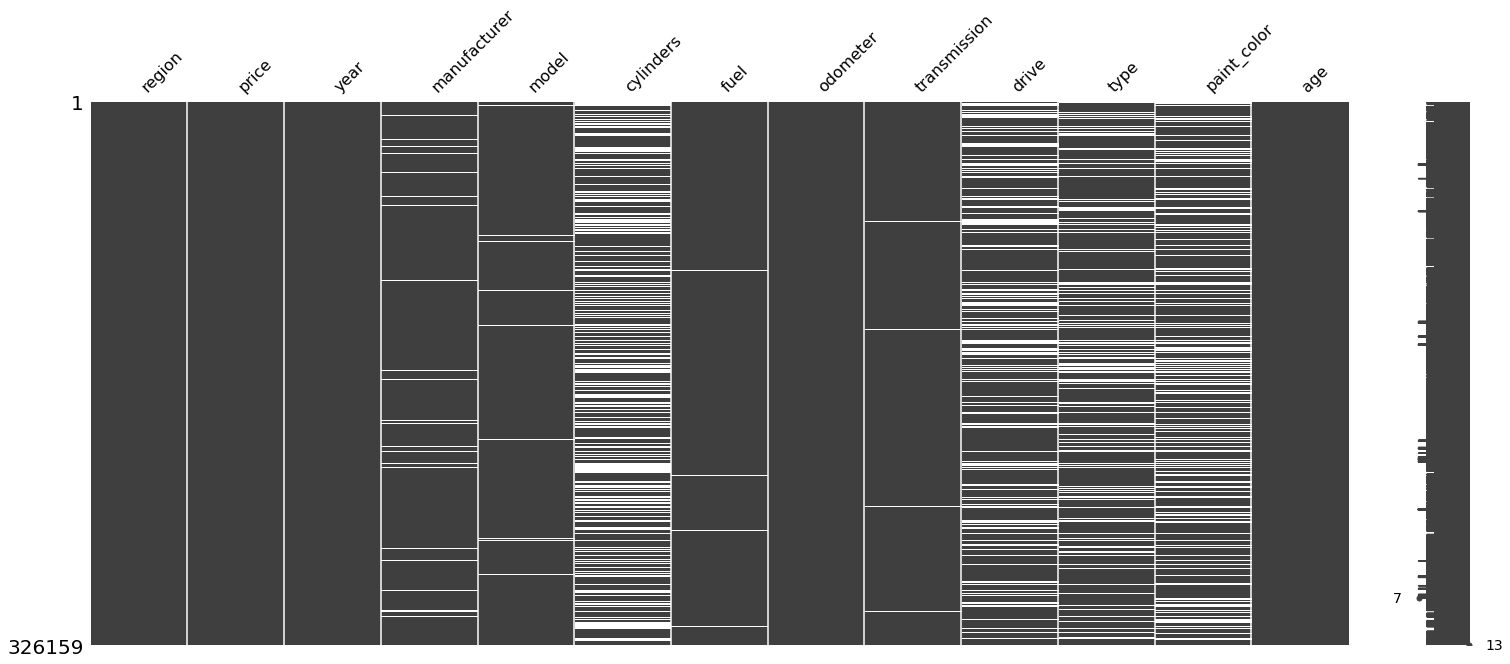

In [38]:
missingno.matrix(rawData)

In [39]:
drop_index = rawData[rawData.cylinders.isna()].index
rawData.drop(index=drop_index, inplace=True)

<AxesSubplot:>

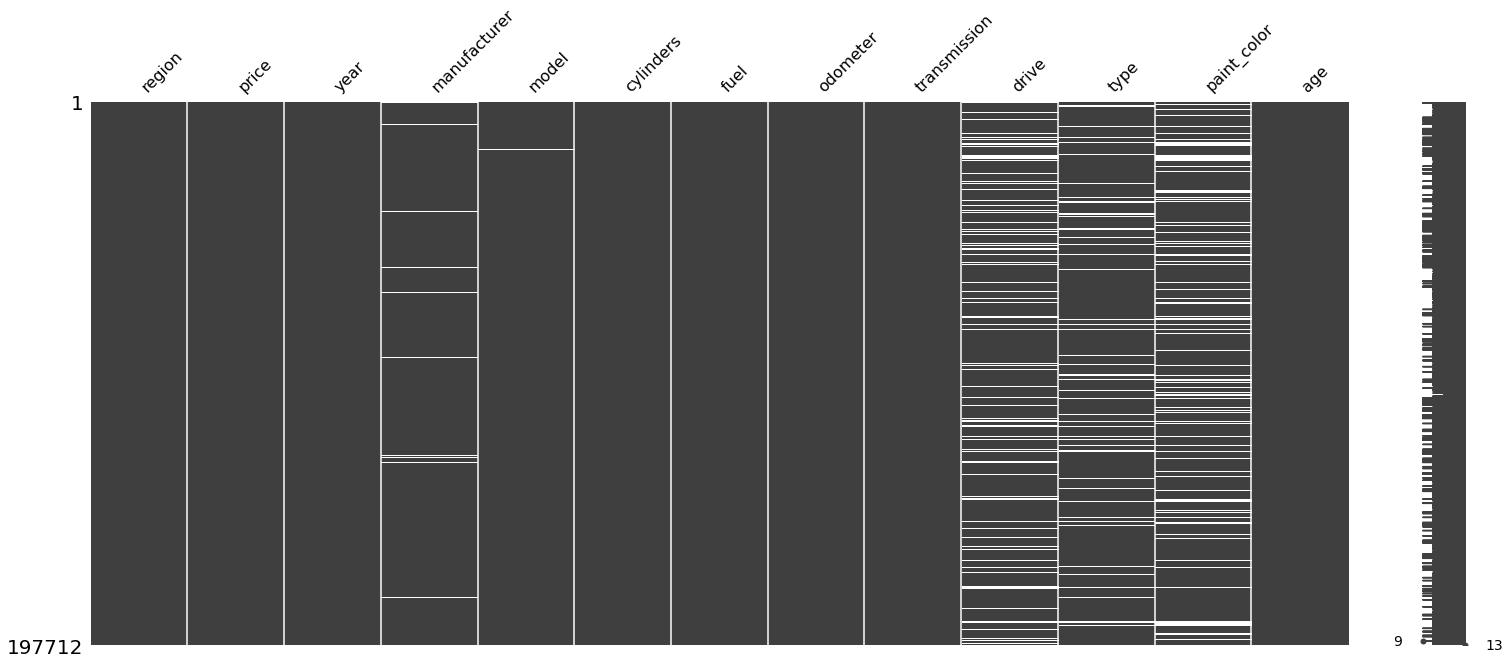

In [41]:
missingno.matrix(rawData)

In [42]:
# 차량색을 기준으로 결측치를 제거
drop_index = rawData[ rawData['paint_color'].isna() ].index
rawData.drop( drop_index, inplace=True )

In [43]:
# drive 기준으로 결측치를 제거
drop_index = rawData[ rawData['drive'].isna() ].index
rawData.drop( drop_index, inplace=True )

In [44]:
# type 기준으로 결측치를 제거
drop_index = rawData[ rawData['type'].isna() ].index
rawData.drop( drop_index, inplace=True )

In [45]:
# 제조사가 없는 경우 제거
drop_index = rawData[ rawData['manufacturer'].isna() ].index
rawData.drop( drop_index, inplace=True )

In [46]:
# 마지막으로 연료타입이 없는 경우 제거
drop_index = rawData[ rawData['fuel'].isna() ].index
rawData.drop( drop_index, inplace=True )

In [48]:
rawData.drop( columns=['region', 'year', 'model'], inplace=True)
rawData

,price,manufacturer,cylinders,fuel,odometer,transmission,drive,type,paint_color,age
31,15000,ford,6 cylinders,gas,128000.0,automatic,rwd,truck,black,8.0
32,27990,gmc,8 cylinders,gas,68696.0,other,4wd,pickup,black,9.0
33,34590,chevrolet,6 cylinders,gas,29499.0,other,4wd,pickup,silver,5.0
34,35000,toyota,6 cylinders,gas,43000.0,automatic,4wd,truck,grey,2.0
35,29990,chevrolet,6 cylinders,gas,17302.0,other,4wd,pickup,red,5.0
...,...,...,...,...,...,...,...,...,...,...
426857,41990,toyota,6 cylinders,gas,36630.0,other,4wd,SUV,white,2.0
426860,39990,infiniti,8 cylinders,gas,41664.0,automatic,4wd,other,black,4.0
426866,32990,infiniti,8 cylinders,gas,55612.0,automatic,rwd,other,black,5.0
426874,33590,lexus,6 cylinders,gas,30814.0,automatic,rwd,sedan,white,3.0


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
rawData[['odometer', 'age']]

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import myLib

In [51]:
rawData = pd.read_csv('vehicles.csv')

In [52]:
# 아웃라이어 제거
current_year = 2021
rawData['age'] = current_year - rawData['year']

high = rawData['price'].quantile(0.99)
low = rawData['price'].quantile(0.1)
rawData = rawData[ (high > rawData['price']) & (rawData['price'] > low ) ]

high = rawData['odometer'].quantile(0.99)
low = rawData['odometer'].quantile(0.1)
rawData = rawData[ (high > rawData['odometer']) & (rawData['odometer'] > low ) ]

rawData = rawData[ rawData['age'] <= 30 ]


# 사용하지 않는 변수 제거
drop_columns = [
  'id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'state', 'posting_date', 'title_status',
  'size', 'condition', 'lat', 'long', 'region', 'year', 'model'

]
rawData.drop(columns=drop_columns, inplace=True)

# 결측치 제거
drop_index = rawData[ rawData['cylinders'].isna() ].index
rawData.drop( drop_index, inplace=True )
drop_index = rawData[ rawData['paint_color'].isna() ].index
rawData.drop( drop_index, inplace=True )
drop_index = rawData[ rawData['drive'].isna() ].index
rawData.drop( drop_index, inplace=True )
drop_index = rawData[ rawData['type'].isna() ].index
rawData.drop( drop_index, inplace=True )
drop_index = rawData[ rawData['manufacturer'].isna() ].index
rawData.drop( drop_index, inplace=True )
drop_index = rawData[ rawData['fuel'].isna() ].index
rawData.drop( drop_index, inplace=True )

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))

In [56]:
rawData

,price,manufacturer,cylinders,fuel,odometer,transmission,drive,type,paint_color,age
31,15000,ford,6 cylinders,gas,128000.0,automatic,rwd,truck,black,8.0
32,27990,gmc,8 cylinders,gas,68696.0,other,4wd,pickup,black,9.0
33,34590,chevrolet,6 cylinders,gas,29499.0,other,4wd,pickup,silver,5.0
34,35000,toyota,6 cylinders,gas,43000.0,automatic,4wd,truck,grey,2.0
35,29990,chevrolet,6 cylinders,gas,17302.0,other,4wd,pickup,red,5.0
...,...,...,...,...,...,...,...,...,...,...
426857,41990,toyota,6 cylinders,gas,36630.0,other,4wd,SUV,white,2.0
426860,39990,infiniti,8 cylinders,gas,41664.0,automatic,4wd,other,black,4.0
426866,32990,infiniti,8 cylinders,gas,55612.0,automatic,rwd,other,black,5.0
426874,33590,lexus,6 cylinders,gas,30814.0,automatic,rwd,sedan,white,3.0


In [57]:
rawData[['odometer', 'age']] = scaler.fit_transform(rawData[['odometer', 'age']])

In [58]:
rawData

,price,manufacturer,cylinders,fuel,odometer,transmission,drive,type,paint_color,age
31,15000,ford,6 cylinders,gas,0.424692,automatic,rwd,truck,black,0.290323
32,27990,gmc,8 cylinders,gas,0.200192,other,4wd,pickup,black,0.322581
33,34590,chevrolet,6 cylinders,gas,0.051809,other,4wd,pickup,silver,0.193548
34,35000,toyota,6 cylinders,gas,0.102918,automatic,4wd,truck,grey,0.096774
35,29990,chevrolet,6 cylinders,gas,0.005637,other,4wd,pickup,red,0.193548
...,...,...,...,...,...,...,...,...,...,...
426857,41990,toyota,6 cylinders,gas,0.078804,other,4wd,SUV,white,0.096774
426860,39990,infiniti,8 cylinders,gas,0.097861,automatic,4wd,other,black,0.161290
426866,32990,infiniti,8 cylinders,gas,0.150662,automatic,rwd,other,black,0.193548
426874,33590,lexus,6 cylinders,gas,0.056787,automatic,rwd,sedan,white,0.129032


In [59]:
rawData = pd.get_dummies(data= rawData, columns=['manufacturer', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color'])

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet

In [67]:
x = rawData.drop(columns=['price'])
y = rawData[['price']]

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [70]:
model = LinearRegression().fit(x_train, y_train)

In [71]:
yhat_train = model.predict(x_train)
train_score = r2_score(y_train, yhat_train)
train_mse = mean_squared_error(y_train, yhat_train)
train_mae = mean_absolute_error(y_train, yhat_train)
print(train_score, train_mse, train_mae)

0.7556597427585694 35571046.53251526 4305.119188283884


In [72]:
yhat_test = model.predict(x_test)
test_score = r2_score(y_test, yhat_test)
test_mse = mean_squared_error(y_test, yhat_test)
test_mae = mean_absolute_error(y_test, yhat_test)
print(test_score, test_mse, test_mae)

0.7552461303855235 35841785.550586805 4302.865135572642


In [77]:
pd.DataFrame(data= model.coef_.T, columns=['coef'])

,coef
0,-1.892289e+04
1,-2.861974e+04
2,4.163146e+14
3,4.163146e+14
4,4.163146e+14
...,...
80,-1.091140e+14
81,-1.091140e+14
82,-1.091140e+14
83,-1.091140e+14


In [82]:
pd.concat([(pd.DataFrame(data= model.coef_.T, columns=['coef'])), (pd.DataFrame(data=x_train.columns, columns=['feature']))], axis=1)

,coef,feature
0,-1.892289e+04,odometer
1,-2.861974e+04,age
2,4.163146e+14,manufacturer_acura
3,4.163146e+14,manufacturer_alfa-romeo
4,4.163146e+14,manufacturer_aston-martin
...,...,...
80,-1.091140e+14,paint_color_purple
81,-1.091140e+14,paint_color_red
82,-1.091140e+14,paint_color_silver
83,-1.091140e+14,paint_color_white


In [83]:
folds = KFold(n_splits=10, shuffle=True)

In [84]:
model = ElasticNet()
params = dict(
    l1_ratio = [0, 0.3, 0.5, 0.8, 1],
    alpha = [0.01, 0.1, 1, 10]
)

In [85]:
search = GridSearchCV(model, params, scoring='r2', cv=folds)
result = search.fit(x_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1977667094530.4414, tolerance: 1207027736.3746603


KeyboardInterrupt: 

In [86]:
model = ElasticNet(l1_ratio=1, alpha=0.1).fit(x_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 54630949654.49707, tolerance: 1342960635.559822


In [87]:
yhat_train = model.predict(x_train)
train_score = r2_score(y_train, yhat_train)
train_mse = mean_squared_error(y_train, yhat_train)
train_mae = mean_absolute_error(y_train, yhat_train)
print(train_score, train_mse, train_mae)

0.7556584718864969 35571231.546029344 4305.556999567798


In [88]:
yhat_test = model.predict(x_test)
test_score = r2_score(y_test, yhat_test)
test_mse = mean_squared_error(y_test, yhat_test)
test_mae = mean_absolute_error(y_test, yhat_test)
print(test_score, test_mse, test_mae)

0.755233634026297 35843615.51890668 4303.381167580117


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:>

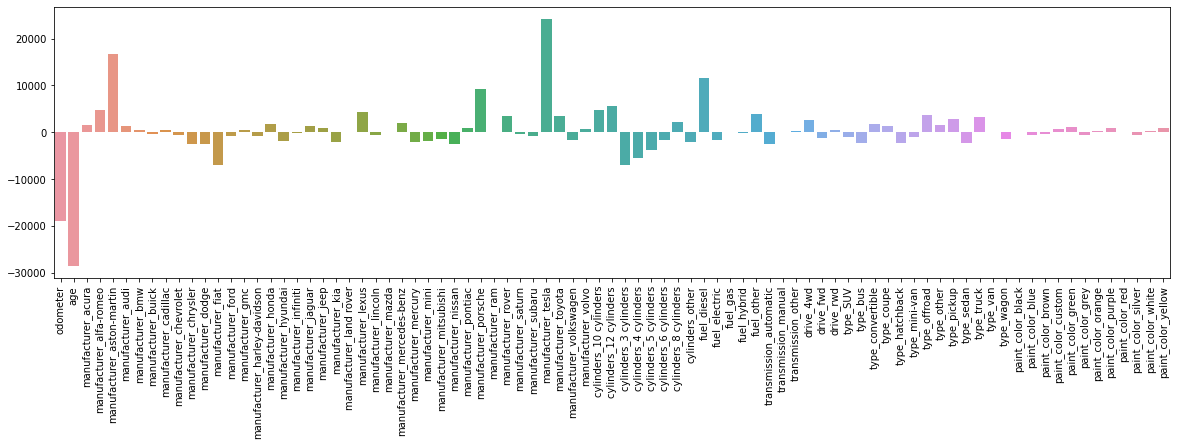

In [90]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x_train.columns, model.coef_)

In [93]:
from sklearn.feature_selection import RFECV

In [94]:
folds = KFold(n_splits=10, shuffle=True)
model = ElasticNet(l1_ratio=1, alpha=0.1)
result = RFECV(model, cv=folds, scoring='r2', min_features_to_select=10)
result.fit(x_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 48425247596.206055, tolerance: 1207400019.6510415
Objective did not converge. You might want to increase the number of iterations. Duality gap: 48425248736.5791, tolerance: 1207400019.6510415
Objective did not converge. You might want to increase the number of iterations. Duality gap: 48434847434.17236, tolerance: 1207400019.6510415
Objective did not converge. You might want to increase the number of iterations. Duality gap: 48434847437.234375, tolerance: 1207400019.6510415
Objective did not converge. You might want to increase the number of iterations. Duality gap: 48434847441.32031, tolerance: 1207400019.6510415
Objective did not converge. You might want to increase the number of iterations. Duality gap: 48434847621.166016, tolerance: 1207400019.6510415
Objective did not converge. You might want to increase the number of iterations. Duality gap: 48434590335.467285, tolerance: 1207400019.6510

KeyboardInterrupt: 

In [95]:
import shap

In [96]:
model = ElasticNet(l1_ratio=1, alpha=0.1)
model.fit(x_train, y_train)

Objective did not converge. You might want to increase the number of iterations. Duality gap: 54630949654.49707, tolerance: 1342960635.559822


ElasticNet(alpha=0.1, l1_ratio=1)

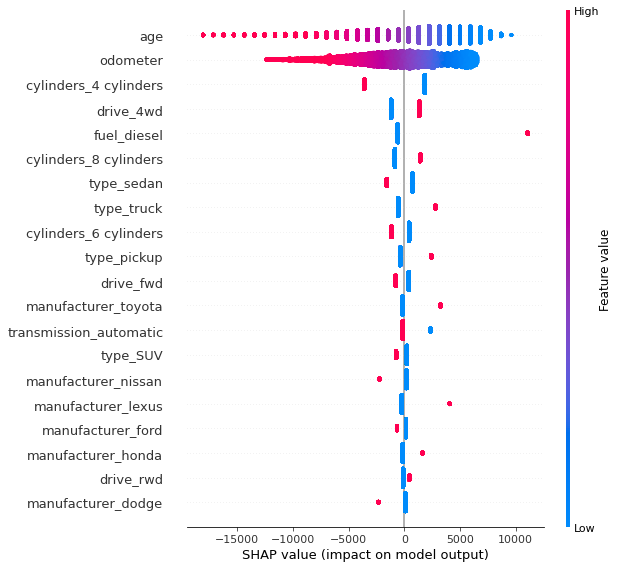

In [97]:
explainer = shap.LinearExplainer(model, x_train)
shap_value = explainer.shap_values(x_train)
shap.summary_plot(shap_value, x_train)


In [98]:
from sklearn.svm import SVR

In [ ]:
folds = KFold(n_splits=10, shuffle=True)
model = SVR()

params = dict(
    C=[0.01, 0.1, 1, 10],
    gamma = [0.01, 0.1, 1, 10]
)
search = GridSearchCV(estimator=model, param_grid=params, cv=folds, scoring='neg_mean_squared_error')

In [99]:
from sklearn.ensemble import RandomForestRegressor